In [3]:
# Importing libraries
import pandas as pd
import pickle

# Loading the data file "ipl.csv"
datafile = pd.read_csv('ipl.csv')

In [5]:
# lets return the first row of data.
datafile.head(5)          #default: 5

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
datafile.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

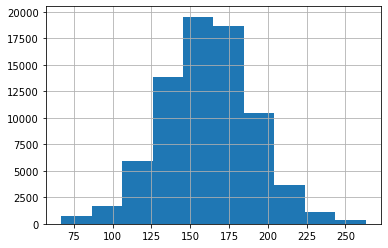

In [8]:
datafile.total.hist()

In [ ]:
# As we can see most of the scores are around 150.

In [3]:
# Data Cleaning part
# lets remove columns not required.
# As batsman and bowler are changed time by time in teams so it will be not a good idea to select them.
# Also same for striker an non-striker.
to_remove_cols = ['mid', 'batsman', 'bowler', 'striker', 'non-striker']
datafile.drop(labels=to_remove_cols, axis=1, inplace=True)

In [4]:
datafile.head(2)

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222


In [5]:
# checking all the teams present in data.
datafile["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [6]:
# lets remove all the teams not present now.
required_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                  'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                  'Delhi Daredevils', 'Sunrisers Hyderabad']

In [7]:
datafile = datafile[(datafile["bat_team"].isin(required_teams)) & (datafile["bowl_team"].isin(required_teams))]

In [8]:
# lets remove all the rows where over is less than 5.
datafile = datafile[datafile["overs"]>=5.0]

In [9]:
print("Batting Teams: ", datafile['bat_team'].unique())
print("\n\n")
print("Bowling Teams: ", datafile['bowl_team'].unique())


Batting Teams:  ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']



Bowling Teams:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [10]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
datafile['date'] = datafile['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [15]:
# Converte categorical features using OneHotEncoding method
encoded_file = pd.get_dummies(data=datafile, columns=['bat_team', 'bowl_team', 'venue'])

In [16]:
encoded_file.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,"venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
encoded_file.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'ven

In [18]:
# lets rearrange the columns to look more readable
# Rearranging the columns
encoded_file = encoded_file[['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad', 'venue_Barabati Stadium',
       'venue_Brabourne Stadium', 'venue_Buffalo Park',
       'venue_De Beers Diamond Oval', 'venue_Dr DY Patil Sports Academy',
       'venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_Feroz Shah Kotla',
       'venue_Himachal Pradesh Cricket Association Stadium',
       'venue_Holkar Cricket Stadium',
       'venue_JSCA International Stadium Complex', 'venue_Kingsmead',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Maharashtra Cricket Association Stadium',
       'venue_New Wanderers Stadium', 'venue_Newlands',
       'venue_OUTsurance Oval',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
       'venue_Sardar Patel Stadium, Motera', 'venue_Sawai Mansingh Stadium',
       'venue_Shaheed Veer Narayan Singh International Stadium',
       'venue_Sharjah Cricket Stadium', 'venue_Sheikh Zayed Stadium',
       "venue_St George's Park", 'venue_Subrata Roy Sahara Stadium',
       'venue_SuperSport Park', 'venue_Wankhede Stadium']]

In [19]:
# Splitting the data into train and test set
X_train = encoded_file.drop(labels='total', axis=1)[encoded_file['date'].dt.year <= 2016]
X_test = encoded_file.drop(labels='total', axis=1)[encoded_file['date'].dt.year >= 2017]

y_train = encoded_file[encoded_file['date'].dt.year <= 2016]['total'].values
y_test = encoded_file[encoded_file['date'].dt.year >= 2017]['total'].values

In [20]:
# lets remove the data columns as it is not required now .
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [21]:
# MODEL BUILDING

In [22]:
# Lets use linear regression Modeling
from sklearn.linear_model import LinearRegression as lr
regressor = lr()
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [24]:
#lets predicts:
prediction=regressor.predict(X_test)

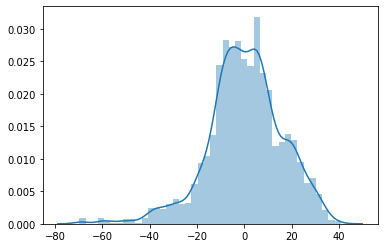

In [22]:
import seaborn as sns
sns.distplot(y_test-prediction)

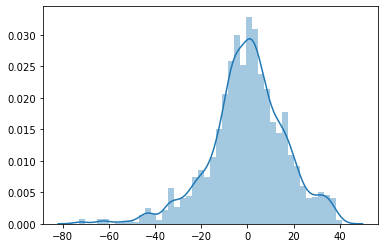

In [25]:
import seaborn as sns
sns.distplot(y_test-prediction)

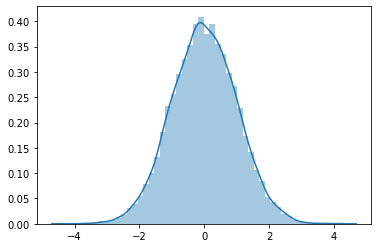

In [28]:

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
 
data = np.random.randn(200, 100)
res = sn.distplot(data)
plt.show()

In [29]:
data

array([[ 0.23044956,  1.14618092,  1.73602687, ...,  0.57100692,
         1.02584148, -0.30501229],
       [-0.40849071, -1.04394638, -0.91772205, ..., -2.17930931,
        -0.32861054, -0.04662111],
       [-1.31329698, -0.86676261,  3.61561661, ...,  0.77825413,
        -2.41136391, -2.13545001],
       ...,
       [ 1.82491962, -0.89537255, -0.0433985 , ...,  1.46247059,
        -0.01074582,  1.08722319],
       [ 1.73218392,  1.83172697, -0.26039489, ...,  0.1817102 ,
         0.55627358, -2.44563943],
       [ 0.26131168,  1.49693739, -0.70237686, ..., -1.67250166,
        -0.06155102,  0.41738749]])

In [33]:
data.sort()

In [31]:
data

array([[-2.18084811, -1.5957217 , -1.58199489, ...,  2.16965383,
         2.18239072,  2.47048756],
       [-2.54441734, -2.31118331, -2.27356545, ...,  1.70869603,
         1.96445794,  2.57772956],
       [-3.26036592, -3.14899704, -2.55710463, ...,  2.41619984,
         2.57063193,  3.61561661],
       ...,
       [-3.091574  , -2.6470077 , -2.19336367, ...,  1.75990422,
         1.82491962,  2.12513816],
       [-2.44563943, -2.13428343, -1.94383502, ...,  1.73218392,
         1.83172697,  1.85602147],
       [-2.19338544, -2.11066141, -1.87051375, ...,  2.52902643,
         2.62826191,  2.70691329]])